In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=10, precision=2, linewidth=120, sci_mode=False)

In [5]:
def visMatr(matrix):
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Matrix Visualization')
    plt.show()

In [6]:
# Embedding demo:
example = "Tom mag kiwis"
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ "
dictionary = {alphabet[i]:i for i in range(len(alphabet))}
tokenized = [dictionary[i] for i in example]
detokenized = [alphabet[i] for i in tokenized]

len_alphabet = len(alphabet)
embedding = nn.Embedding(len_alphabet, 3)
# embedding.weight = nn.Parameter(torch.ones((len_alphabet, 3), dtype=torch.float32))

tokenized = torch.tensor(tokenized, dtype=torch.long)
embedded = embedding(tokenized)

quer_proj = nn.Linear(3, 3)
key_proj = nn.Linear(3, 3)
val_proj = nn.Linear(3, 3)

Q = quer_proj(embedded)
K = key_proj(embedded)
V = val_proj(embedded)
print(Q)
print(K)
V

tensor([[ 1.01,  0.32, -0.44],
        [ 0.31,  0.13,  0.14],
        [ 0.50, -0.28, -0.60],
        [ 0.54,  0.87, -0.06],
        [ 0.50, -0.28, -0.60],
        [ 0.42,  0.26,  0.01],
        [ 0.37,  0.13,  0.11],
        [ 0.54,  0.87, -0.06],
        [ 0.89, -0.44, -0.71],
        [ 0.18,  0.56,  0.13],
        [-0.10, -0.21,  0.15],
        [ 0.18,  0.56,  0.13],
        [ 0.23,  0.22, -0.05]], grad_fn=<AddmmBackward0>)
tensor([[-0.10,  0.55,  0.43],
        [ 0.25,  0.41, -0.27],
        [-0.27,  0.34,  0.66],
        [ 0.12,  0.37,  1.14],
        [-0.27,  0.34,  0.66],
        [ 0.17,  0.41,  0.11],
        [ 0.23,  0.43, -0.28],
        [ 0.12,  0.37,  1.14],
        [-0.31,  0.51,  0.05],
        [ 0.23,  0.29,  0.69],
        [ 0.22,  0.27, -0.21],
        [ 0.23,  0.29,  0.69],
        [ 0.10,  0.31,  0.50]], grad_fn=<AddmmBackward0>)


tensor([[ 0.59,  0.01, -0.55],
        [-0.01, -0.78, -0.21],
        [ 1.42,  0.43, -0.03],
        [ 0.15,  0.50, -1.37],
        [ 1.42,  0.43, -0.03],
        [ 0.15, -0.40, -0.44],
        [ 0.01, -0.78, -0.20],
        [ 0.15,  0.50, -1.37],
        [ 1.34, -0.12,  0.34],
        [ 0.07,  0.08, -0.94],
        [ 0.34, -0.64,  0.09],
        [ 0.07,  0.08, -0.94],
        [ 0.44,  0.02, -0.53]], grad_fn=<AddmmBackward0>)

tensor([[83272187614028302909440., 2037482514617940836352., 15709571449012355072., 766900879836704682782228480., 1999047104349077504., 178557889363653989236736., 48402872943608335224012800., 192563432787017728., 111222800384., 2126244067760176998907904.],
        [107223384274697405333504., 64500034893711933440., 1078820262050267136., 166953157959033770999808., 227734215196672., 169807942475027841024., 111437992769422884864., 105106942984192., 4851628799374433189888., 243510487896139889303879680.],
        [2183127773645598070145024., 12247391693746267488256., 185161022292623360., 3720886117809302167093248., 8439986126848., 167555415330002772688896., 269958463222911598592., 1518345966845952., 37124117308414885888., 95579673818985528245092352.],
        [3491821296549888., 123659821056., 2002426351003300819632128., 23539176158219206656., 1579327733751514180247093248., 1198575744., 1050389096725616443523072., 14773356058378240., 6851196002238464., 104571340343822254080.],
        [809427

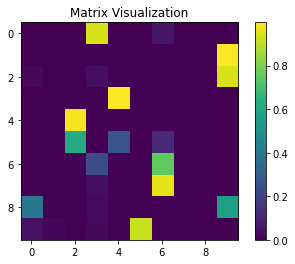

In [13]:
queries = torch.tensor([
    [2.05, 1.11, 0.72, 3.17],
    [0.03, 2.66, 1.63, 2.50],
    [0.19, 2.00, 1.71, 3.00],
    [2.68, 2.94, 0.39, 0.24],
    [2.44, 2.08, 2.10, 1.15],
    [2.49, 2.57, 1.41, 1.11],
    [2.57, 1.95, 1.30, 1.97],
    [2.76, 1.60, 0.43, 2.37],
    [0.12, 2.14, 2.17, 2.58],
    [0.40, 0.85, 1.92, 3.38]
], dtype=torch.float32)

keys = torch.tensor([
    [1.42, 1.20, 2.79, 2.19],
    [1.35, 0.36, 3.04, 2.18],
    [2.65, 2.01, 2.15, 0.58],
    [2.01, 1.54, 1.51, 2.70],
    [3.15, 2.33, 0.75, 0.30],
    [1.18, 0.13, 2.57, 2.83],
    [2.72, 1.97, 0.64, 2.07],
    [2.44, 0.48, 3.05, 0.70],
    [0.18, 2.50, 3.10, 0.31],
    [0.98, 2.70, 0.83, 2.65]
], dtype=torch.float32)

seq_len = keys.shape[0]
keys = keys.transpose(0, 1)

att_original = queries @ keys
# mask = torch.triu(torch.full((seq_len, seq_len), -float('inf')), diagonal=1)
# att_original += mask
# att_original /= seq_len**(1/2)
att = att_original.exp()
print(att)
sums = att.sum(dim=-1)
sums = sums.unsqueeze(0).transpose(0, 1)
att = att / sums
# print(F.softmax(att_original, -1))
visMatr(att)

In [18]:
# plug out the values:
values = torch.tensor([
    [1.05, 0.80, 2.20, 0.50],
    [0.60, 1.25, 1.15, 0.95],
    [0.75, 1.60, 0.90, 2.10],
    [1.30, 0.55, 0.40, 1.75],
    [0.85, 1.10, 0.30, 1.45],
    [2.05, 0.70, 1.20, 0.25],
    [1.50, 0.95, 1.40, 0.65],
    [0.40, 1.80, 0.35, 1.00],
    [1.15, 0.45, 2.00, 0.80],
    [0.25, 1.35, 1.05, 1.65]
], dtype=torch.float32)

print("attention:", att)
print("values:", values)
print("att @ values:", att@values)

attention: tensor([[    1.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.95,     0.05,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.88,     0.11,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.00,     0.00,     0.99,     0.01,     0.00,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.07,     0.01,     0.76,     0.08,     0.09,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.01,     0.00,     0.54,     0.06,     0.38,     0.00,     0.00,     0.00,     0.00,     0.00],
        [    0.03,     0.00,     0.09,     0.32,     0.04,     0.00,     0.51,     0.00,     0.00,     0.00],
        [    0.00,     0.00,     0.01,     0.22,     0.02,     0.00,     0.75,     0.00,     0.00,     0.00],
        [    0.57,     0.07,     0.00,     0.20,     0.00,     0.09,     0.00,     0.00,     0.05,     0.00],